KeyboardInterrupt: 

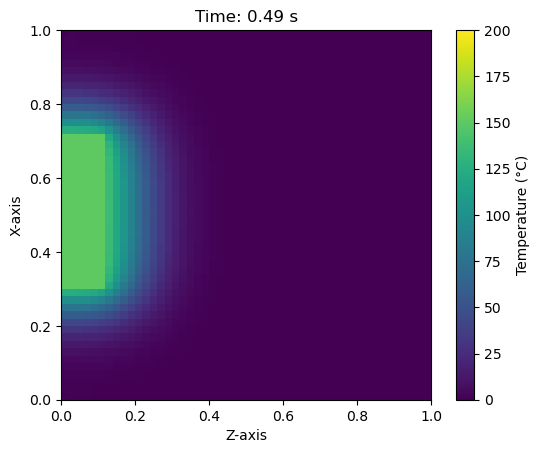

In [26]:
#Before we start studying the periodic behaviour we make the model better.
#This is the 3d case, the animation is the cross section temperature diffusion. This is the base code for 3d case.This code includes the
#effect of rising water using advection.
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
import time

# Parameters
length_x = 1.0      # Length of the domain in the x-direction
length_y = 1.0      # Length of the domain in the y-direction
length_z = 1.0      # Length of the domain in the z-direction
num_points_x = 50   # Number of spatial points in the x-direction
num_points_y = 50   # Number of spatial points in the y-direction
num_points_z = 50   # Number of spatial points in the z-direction
alpha = 0.01        # Thermal diffusivity
velocity = 10      # Advection velocity in the z-direction

# Spatial discretization
dx = length_x / (num_points_x - 1)
dy = length_y / (num_points_y - 1)
dz = length_z / (num_points_z - 1)
x = np.linspace(0, length_x, num_points_x)
y = np.linspace(0, length_y, num_points_y)
z = np.linspace(0, length_z, num_points_z)
X, Y, Z = np.meshgrid(x, y, z)

# Time parameters
total_time = 20.0    # Total simulation time (seconds)
num_time_steps = 3200
dt = total_time / num_time_steps

# Initialize temperature field
initial_temperature = np.zeros((num_points_x, num_points_y, num_points_z))

# Define heat source
heat_source = {   
    'position_x': [0.3, 0.7],
    'position_y': [0.3, 0.7],
    'position_z': [0.0, 0.1],
    'temperature': 150.0
}

# Set initial temperature within the heat source region
source_x_start = int(heat_source['position_x'][0] * num_points_x)
source_x_end = int(heat_source['position_x'][1] * num_points_x) + 1
source_y_start = int(heat_source['position_y'][0] * num_points_y)
source_y_end = int(heat_source['position_y'][1] * num_points_y) + 1
source_z_start = int(heat_source['position_z'][0] * num_points_z)
source_z_end = int(heat_source['position_z'][1] * num_points_z) + 1
initial_temperature[source_x_start:source_x_end, source_y_start:source_y_end, source_z_start:source_z_end] = heat_source['temperature']

# Create 2D plot for x-z plane at y=0.5
fig, ax = plt.subplots()
plot = ax.imshow(initial_temperature[:, int(0.5 * num_points_y), :], extent=[0, length_z, 0, length_x], origin='lower', cmap='viridis', vmin=0, vmax=200)
ax.set_title('Temperature in x-z Plane at y=0.1')
ax.set_xlabel('Z-axis')
ax.set_ylabel('X-axis')
cbar = plt.colorbar(plot, ax=ax, label='Temperature (°C)')

# Initialize updated_temperature outside the update function
updated_temperature = initial_temperature.copy()

# Function to update the plot for each time step
def update(frame):
    global updated_temperature, initial_temperature
    # Finite difference solution
    updated_temperature = initial_temperature.copy()

    # Apply advection-diffusion to the entire domain
    updated_temperature[1:-1, 1:-1, 1:-1] += alpha * dt * (
        (updated_temperature[:-2, 1:-1, 1:-1] - 2 * updated_temperature[1:-1, 1:-1, 1:-1] + updated_temperature[2:, 1:-1, 1:-1]) / dx**2 +
        (updated_temperature[1:-1, :-2, 1:-1] - 2 * updated_temperature[1:-1, 1:-1, 1:-1] + updated_temperature[1:-1, 2:, 1:-1]) / dy**2 +
        (updated_temperature[1:-1, 1:-1, :-2] - 2 * updated_temperature[1:-1, 1:-1, 1:-1] + updated_temperature[1:-1, 1:-1, 2:]) / dz**2 -
        velocity * (updated_temperature[1:-1, 1:-1, 1:-1] - updated_temperature[1:-1, 1:-1, :-2]) / dz
    )

    # Apply Dirichlet boundary conditions for the heat source
    updated_temperature[source_x_start:source_x_end, source_y_start:source_y_end, source_z_start:source_z_end] = heat_source['temperature']

    # Apply Neumann boundary conditions
    updated_temperature[0, 1:-1, 1:-1] = updated_temperature[1, 1:-1, 1:-1]  # Left boundary
    updated_temperature[-1, 1:-1, 1:-1] = updated_temperature[-2, 1:-1, 1:-1]  # Right boundary
    updated_temperature[1:-1, 0, 1:-1] = updated_temperature[1:-1, 1, 1:-1]  # Front boundary
    updated_temperature[1:-1, -1, 1:-1] = updated_temperature[1:-1, -2, 1:-1]  # Back boundary
    updated_temperature[1:-1, 1:-1, 0] = updated_temperature[1:-1, 1:-1, 1]  # Top boundary
    updated_temperature[1:-1, 1:-1, -1] = updated_temperature[1:-1, 1:-1, -2]  # Bottom boundary

    # Apply constraints
    updated_temperature[updated_temperature < 0] = 0  # Ensure temperature is not negative
    updated_temperature[updated_temperature > heat_source['temperature']] = heat_source['temperature']

    # Update initial temperature for the next iteration
    initial_temperature = updated_temperature.copy()

    # Update plot data
    plot.set_data(updated_temperature[:, int(0.5 * num_points_y), :])
    ax.set_title(f'Time: {frame * dt:.2f} s')
    display(fig)  # Display the updated plot inline
    clear_output(wait=True)  # Clear the previous output for a clean display
    time.sleep(0.01)  # Add a small delay between frames for better visualization

# Display each frame in line
for frame in range(num_time_steps):
    update(frame)
    time.sleep(0.01)  # Add a small delay between frames




KeyboardInterrupt: 

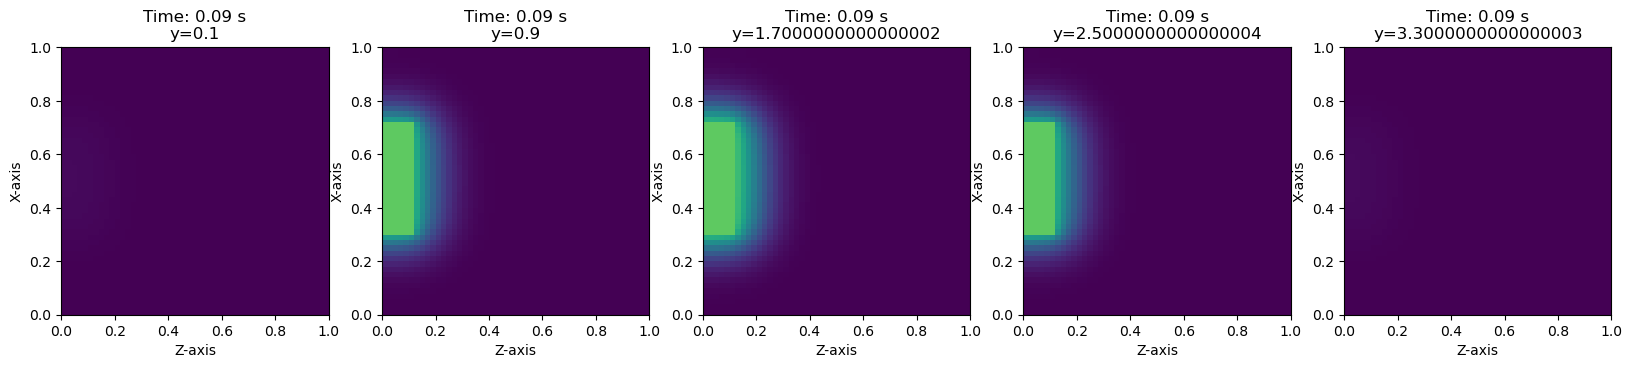

In [2]:
#This is the temperature visualization for more cross sections. 
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
import time

# Parameters
length_x = 1.0      # Length of the domain in the x-direction
length_y = 1.0      # Length of the domain in the y-direction
length_z = 1.0      # Length of the domain in the z-direction
num_points_x = 50   # Number of spatial points in the x-direction
num_points_y = 50   # Number of spatial points in the y-direction
num_points_z = 50   # Number of spatial points in the z-direction
alpha = 0.05        # Thermal diffusivity
velocity = 10.0
# Spatial discretization
dx = length_x / (num_points_x - 1)
dy = length_y / (num_points_y - 1)
dz = length_z / (num_points_z - 1)
x = np.linspace(0, length_x, num_points_x)
y = np.linspace(0, length_y, num_points_y)
z = np.linspace(0, length_z, num_points_z)
X, Y, Z = np.meshgrid(x, y, z)

# Time parameters
total_time = 5    # Total simulation time (seconds)
num_time_steps = 4000
dt = total_time / num_time_steps

# Initial temperature distribution
initial_temperature = np.zeros((num_points_x, num_points_y, num_points_z))

# Define heat source
heat_source = {   
    'position_x': [0.3, 0.7],
    'position_y': [0.3, 0.7],
    'position_z': [0.0, 0.1],  # Specify x=0 to x=0.01
    'temperature': 150.0
}

# Set initial temperature within the heat source region
source_x_start = int(heat_source['position_x'][0] * num_points_x)
source_x_end = int(heat_source['position_x'][1] * num_points_x) + 1
source_y_start = int(heat_source['position_y'][0] * num_points_y)
source_y_end = int(heat_source['position_y'][1] * num_points_y) + 1
source_z_start = int(heat_source['position_z'][0] * num_points_z)
source_z_end = int(heat_source['position_z'][1] * num_points_z) + 1
initial_temperature[:, :, :] = 0.0  # Set initial temperature to 0 everywhere
initial_temperature[source_x_start:source_x_end, source_y_start:source_y_end, source_z_start:source_z_end] = heat_source['temperature']

# Create subplots for y=0.1, 0.3, 0.5, 0.7, 0.9
fig, axs = plt.subplots(1, 5, figsize=(20, 4))
axs = axs.flatten()

# Initialize updated_temperature outside the update function
updated_temperature = initial_temperature.copy()

# Function to update the plot for each time step
def update(frame):
    global updated_temperature, initial_temperature
    # Finite difference solution
    updated_temperature = initial_temperature.copy()

    # Apply advection-diffusion to the entire domain
    updated_temperature[1:-1, 1:-1, 1:-1] += alpha * dt * (
        (updated_temperature[:-2, 1:-1, 1:-1] - 2 * updated_temperature[1:-1, 1:-1, 1:-1] + updated_temperature[2:, 1:-1, 1:-1]) / dx**2 +
        (updated_temperature[1:-1, :-2, 1:-1] - 2 * updated_temperature[1:-1, 1:-1, 1:-1] + updated_temperature[1:-1, 2:, 1:-1]) / dy**2 +
        (updated_temperature[1:-1, 1:-1, :-2] - 2 * updated_temperature[1:-1, 1:-1, 1:-1] + updated_temperature[1:-1, 1:-1, 2:]) / dz**2 -
        velocity * (updated_temperature[1:-1, 1:-1, 1:-1] - updated_temperature[1:-1, 1:-1, :-2]) / dz
    )


    # Apply Dirichlet boundary conditions for the heat source
    updated_temperature[source_x_start:source_x_end, source_y_start:source_y_end, source_z_start:source_z_end] = heat_source['temperature']

    # Apply Neumann boundary conditions
    updated_temperature[0, 1:-1, 1:-1] = updated_temperature[1, 1:-1, 1:-1]  # Left boundary
    updated_temperature[-1, 1:-1, 1:-1] = updated_temperature[-2, 1:-1, 1:-1]  # Right boundary
    updated_temperature[1:-1, 0, 1:-1] = updated_temperature[1:-1, 1, 1:-1]  # Front boundary
    updated_temperature[1:-1, -1, 1:-1] = updated_temperature[1:-1, -2, 1:-1]  # Back boundary
    updated_temperature[1:-1, 1:-1, 0] = updated_temperature[1:-1, 1:-1, 1]  # Top boundary
    updated_temperature[1:-1, 1:-1, -1] = updated_temperature[1:-1, 1:-1, -2]  # Bottom boundary

    # Apply constraints
    updated_temperature[updated_temperature < 0] = 0  # Ensure temperature is not negative
    updated_temperature[updated_temperature > heat_source['temperature']] = heat_source['temperature']
    # Temperature should not be higher than the source or heat exchange will not continue

    # Update initial temperature for the next iteration
    initial_temperature = updated_temperature.copy()

    # Update subplots for y=0.1, 0.3, 0.5, 0.7, 0.9
    for i, ax in enumerate(axs):
        ax.clear()
        ax.imshow(updated_temperature[:, int([0.1, 0.3, 0.5, 0.7, 0.9][i] * num_points_y), :], 
                  extent=[0, length_z, 0, length_x], origin='lower', cmap='viridis', vmin=0, vmax=200)
        ax.set_title(f'Time: {frame * dt:.2f} s\ny={0.1 + i * 0.8}')
        ax.set_xlabel('Z-axis')
        ax.set_ylabel('X-axis')

    display(fig)  # Display the updated plot inline
    clear_output(wait=True)  # Clear the previous output for a clean display
    time.sleep(0.01)  # Add a small delay between frames for better visualization

# Display each frame in line
for frame in range(num_time_steps):
    update(frame)
    time.sleep(0.01)  # Add a small delay between frames

# Ensure the last frame is displayed
update(num_time_steps)
plt.show()


In [11]:
#This is the solver for the temperature at a point at a time.
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
from ipywidgets import interact, widgets

# Parameters
length_x = 1.0      # Length of the domain in the x-direction
length_y = 1.0      # Length of the domain in the y-direction
length_z = 1.0      # Length of the domain in the z-direction
num_points_x = 50   # Number of spatial points in the x-direction
num_points_y = 50   # Number of spatial points in the y-direction
num_points_z = 50   # Number of spatial points in the z-direction
alpha = 0.01        # Thermal diffusivity
velocity = 0.01     # Advection velocity

# Spatial discretization
dx = length_x / (num_points_x - 1)
dy = length_y / (num_points_y - 1)
dz = length_z / (num_points_z - 1)
x = np.linspace(0, length_x, num_points_x)
y = np.linspace(0, length_y, num_points_y)
z = np.linspace(0, length_z, num_points_z)
X, Y, Z = np.meshgrid(x, y, z)

# Time parameters
total_time = 1.0    # Total simulation time (seconds)
num_time_steps = 300
dt = total_time / num_time_steps

# Define heat source
heat_source = {   
    'position_x': [0.3, 0.7],
    'position_y': [0.3, 0.7],
    'position_z': [0.0, 0.1],
    'temperature': 150.0
}

# Set initial temperature within the heat source region
source_x_start = int(heat_source['position_x'][0] * num_points_x)
source_x_end = int(heat_source['position_x'][1] * num_points_x) + 1
source_y_start = int(heat_source['position_y'][0] * num_points_y)
source_y_end = int(heat_source['position_y'][1] * num_points_y) + 1
source_z_start = int(heat_source['position_z'][0] * num_points_z)
source_z_end = int(heat_source['position_z'][1] * num_points_z) + 1

# Initialize temperature field
initial_temperature = np.zeros((num_points_x, num_points_y, num_points_z))

# Set initial temperature within the heat source region
initial_temperature[source_x_start:source_x_end, source_y_start:source_y_end, source_z_start:source_z_end] = heat_source['temperature']

# Initialize updated_temperature outside the update function
updated_temperature = initial_temperature.copy()

# Function to calculate temperature at a specific point and time
def get_temperature_at_point(t, x, y, z):
    # Finite difference solution
    updated_temperature = initial_temperature.copy()

    # Apply advection-diffusion to the entire domain
    updated_temperature[1:-1, 1:-1, 1:-1] += alpha * dt * (
        (updated_temperature[:-2, 1:-1, 1:-1] - 2 * updated_temperature[1:-1, 1:-1, 1:-1] + updated_temperature[2:, 1:-1, 1:-1]) / dx**2 +
        (updated_temperature[1:-1, :-2, 1:-1] - 2 * updated_temperature[1:-1, 1:-1, 1:-1] + updated_temperature[1:-1, 2:, 1:-1]) / dy**2 +
        (updated_temperature[1:-1, 1:-1, :-2] - 2 * updated_temperature[1:-1, 1:-1, 1:-1] + updated_temperature[1:-1, 1:-1, 2:]) / dz**2 -
        velocity * (updated_temperature[1:-1, 1:-1, 1:-1] - updated_temperature[1:-1, 1:-1, :-2]) / dz
    )
    # Apply Dirichlet boundary conditions for the heat source
    updated_temperature[source_x_start:source_x_end, source_y_start:source_y_end, source_z_start:source_z_end] = heat_source['temperature']

    # Apply Neumann boundary conditions
    updated_temperature[0, 1:-1, 1:-1] = updated_temperature[1, 1:-1, 1:-1]  # Left boundary
    updated_temperature[-1, 1:-1, 1:-1] = updated_temperature[-2, 1:-1, 1:-1]  # Right boundary
    updated_temperature[1:-1, 0, 1:-1] = updated_temperature[1:-1, 1, 1:-1]  # Front boundary
    updated_temperature[1:-1, -1, 1:-1] = updated_temperature[1:-1, -2, 1:-1]  # Back boundary
    updated_temperature[1:-1, 1:-1, 0] = updated_temperature[1:-1, 1:-1, 1]  # Top boundary
    updated_temperature[1:-1, 1:-1, -1] = updated_temperature[1:-1, 1:-1, -2]  # Bottom boundary

    # Apply constraints
    updated_temperature[updated_temperature < 0] = 0  # Ensure temperature is not negative
    updated_temperature[updated_temperature > heat_source['temperature']] = heat_source['temperature']

    # Get the temperature at the specified point and time
    point_temperature = updated_temperature[int(x / length_x * num_points_x), int(y / length_y * num_points_y), int(z / length_z * num_points_z)]
    return point_temperature

# Function to interactively input coordinates and frame
def input_coordinates():
    t = float(input("Enter the frame/time value: "))
    x = float(input("Enter the x-coordinate value (between 0 and 1): "))
    y = float(input("Enter the y-coordinate value (between 0 and 1): "))
    z = float(input("Enter the z-coordinate value (between 0 and 1): "))
    
    # Ensure input coordinates are within the valid range
    x = max(0, min(x, 1))
    y = max(0, min(y, 1))
    z = max(0, min(z, 1))
    
    temperature = get_temperature_at_point(t, x, y, z)
    print(f'Temperature at (t={t:.2f}s, x={x}, y={y}, z={z}): {temperature:.4f}')

# Use the interactive input_coordinates function
input_coordinates()




Enter the frame/time value: 100
Enter the x-coordinate value (between 0 and 1): 0.3
Enter the y-coordinate value (between 0 and 1): 0.7
Enter the z-coordinate value (between 0 and 1): 0.12
Temperature at (t=100.00s, x=0.3, y=0.7, z=0.12): 12.0075


In [22]:
#The gradient calculator for all points at all time. Here I skipped the countour and gradient plot because in 3d it is hard to see
#what happens inside interior
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
from ipywidgets import interact, widgets
# Parameters
length_x = 1.0      # Length of the domain in the x-direction
length_y = 1.0      # Length of the domain in the y-direction
length_z = 1.0      # Length of the domain in the z-direction
num_points_x = 50   # Number of spatial points in the x-direction
num_points_y = 50   # Number of spatial points in the y-direction
num_points_z = 50   # Number of spatial points in the z-direction
alpha = 0.01        # Thermal diffusivity
velocity = 0.01     # Advection velocity

# Spatial discretization
dx = length_x / (num_points_x - 1)
dy = length_y / (num_points_y - 1)
dz = length_z / (num_points_z - 1)
x = np.linspace(0, length_x, num_points_x)
y = np.linspace(0, length_y, num_points_y)
z = np.linspace(0, length_z, num_points_z)
X, Y, Z = np.meshgrid(x, y, z)

# Time parameters
total_time = 1.0    # Total simulation time (seconds)
num_time_steps = 300
dt = total_time / num_time_steps

# Define heat source
heat_source = {   
    'position_x': [0.3, 0.7],
    'position_y': [0.3, 0.7],
    'position_z': [0.0, 0.1],
    'temperature': 150.0
}

# Set initial temperature within the heat source region
source_x_start = int(heat_source['position_x'][0] * num_points_x)
source_x_end = int(heat_source['position_x'][1] * num_points_x) + 1
source_y_start = int(heat_source['position_y'][0] * num_points_y)
source_y_end = int(heat_source['position_y'][1] * num_points_y) + 1
source_z_start = int(heat_source['position_z'][0] * num_points_z)
source_z_end = int(heat_source['position_z'][1] * num_points_z) + 1

# Initialize temperature field
initial_temperature = np.zeros((num_points_x, num_points_y, num_points_z))

# Set initial temperature within the heat source region
initial_temperature[source_x_start:source_x_end, source_y_start:source_y_end, source_z_start:source_z_end] = heat_source['temperature']

# Initialize updated_temperature outside the update function
updated_temperature = initial_temperature.copy()
# Function to calculate temperature and temperature gradient at a specific point and time
def get_temperature_and_gradient(t, x, y, z):
    # Finite difference solution
    updated_temperature = initial_temperature.copy()

    # Apply advection-diffusion to the entire domain
    updated_temperature[1:-1, 1:-1, 1:-1] += alpha * dt * (
        (updated_temperature[:-2, 1:-1, 1:-1] - 2 * updated_temperature[1:-1, 1:-1, 1:-1] + updated_temperature[2:, 1:-1, 1:-1]) / dx**2 +
        (updated_temperature[1:-1, :-2, 1:-1] - 2 * updated_temperature[1:-1, 1:-1, 1:-1] + updated_temperature[1:-1, 2:, 1:-1]) / dy**2 +
        (updated_temperature[1:-1, 1:-1, :-2] - 2 * updated_temperature[1:-1, 1:-1, 1:-1] + updated_temperature[1:-1, 1:-1, 2:]) / dz**2 -
        velocity * (updated_temperature[1:-1, 1:-1, 1:-1] - updated_temperature[1:-1, 1:-1, :-2]) / dz
    )
    # Apply Dirichlet boundary conditions for the heat source
    updated_temperature[source_x_start:source_x_end, source_y_start:source_y_end, source_z_start:source_z_end] = heat_source['temperature']

    # Apply Neumann boundary conditions
    updated_temperature[0, 1:-1, 1:-1] = updated_temperature[1, 1:-1, 1:-1]  # Left boundary
    updated_temperature[-1, 1:-1, 1:-1] = updated_temperature[-2, 1:-1, 1:-1]  # Right boundary
    updated_temperature[1:-1, 0, 1:-1] = updated_temperature[1:-1, 1, 1:-1]  # Front boundary
    updated_temperature[1:-1, -1, 1:-1] = updated_temperature[1:-1, -2, 1:-1]  # Back boundary
    updated_temperature[1:-1, 1:-1, 0] = updated_temperature[1:-1, 1:-1, 1]  # Top boundary
    updated_temperature[1:-1, 1:-1, -1] = updated_temperature[1:-1, 1:-1, -2]  # Bottom boundary

    # Calculate temperature at the specified point and time
    point_temperature = updated_temperature[int(x / length_x * num_points_x), int(y / length_y * num_points_y), int(z / length_z * num_points_z)]

    # Calculate temperature gradient using central differences
    grad_x = (updated_temperature[min(num_points_x - 1, int((x + dx) / length_x * num_points_x)), int(y / length_y * num_points_y), int(z / length_z * num_points_z)] - point_temperature) / dx
    grad_y = (updated_temperature[int(x / length_x * num_points_x), min(num_points_y - 1, int((y + dy) / length_y * num_points_y)), int(z / length_z * num_points_z)] - point_temperature) / dy
    grad_z = (updated_temperature[int(x / length_x * num_points_x), int(y / length_y * num_points_y), min(num_points_z - 1, int((z + dz) / length_z * num_points_z))] - point_temperature) / dz

    return point_temperature, grad_x, grad_y, grad_z

# Function to interactively input coordinates and frame
def input_coordinates():
    t = float(input("Enter the frame/time value: "))
    x = float(input("Enter the x-coordinate value (between 0 and 1): "))
    y = float(input("Enter the y-coordinate value (between 0 and 1): "))
    z = float(input("Enter the z-coordinate value (between 0 and 1): "))
    
    # Ensure input coordinates are within the valid range
    x = max(0, min(x, 1))
    y = max(0, min(y, 1))
    z = max(0, min(z, 1))
    
    temperature, grad_x, grad_y, grad_z = get_temperature_and_gradient(t, x, y, z)
    print(f'Temperature at (t={t:.2f}s, x={x}, y={y}, z={z}): {temperature:.4f}')
    print(f'Temperature Gradient: ({grad_x:.4f}, {grad_y:.4f}, {grad_z:.4f})')

# Use the interactive input_coordinates function
input_coordinates()

Enter the frame/time value: 100
Enter the x-coordinate value (between 0 and 1): 0.5
Enter the y-coordinate value (between 0 and 1): 0.5
Enter the z-coordinate value (between 0 and 1): 0.1
Temperature at (t=100.00s, x=0.5, y=0.5, z=0.1): 150.0000
Temperature Gradient: (0.0000, 0.0000, -6761.6350)


In [16]:
#This code generates the temperature at all points in the volume at 100th,200th,300th...frames.
#The code will generate around 100 csv in your working directory
#so if you are intrested in the data please create a new folder to store them....
import numpy as np
import pandas as pd

# Parameters
length_x = 1.0      # Length of the domain in the x-direction
length_y = 1.0      # Length of the domain in the y-direction
length_z = 1.0      # Length of the domain in the z-direction
num_points_x = 50   # Number of spatial points in the x-direction
num_points_y = 50   # Number of spatial points in the y-direction
num_points_z = 50   # Number of spatial points in the z-direction
alpha = 0.01        # Thermal diffusivity
velocity = 10       # Assign an appropriate value to 'velocity'

# Spatial discretization
dx = length_x / (num_points_x - 1)
dy = length_y / (num_points_y - 1)
dz = length_z / (num_points_z - 1)
x = np.linspace(0, length_x, num_points_x)
y = np.linspace(0, length_y, num_points_y)
z = np.linspace(0, length_z, num_points_z)
X, Y, Z = np.meshgrid(x, y, z)

# Time parameters
total_time = 5.0    # Total simulation time (seconds)
num_time_steps = 10000
dt = total_time / num_time_steps

# Initialize temperature field
initial_temperature = np.zeros((num_points_x, num_points_y, num_points_z))

# Set initial temperature within the heat source region
heat_source = {
    'position_x': [0.3, 0.7],
    'position_y': [0.3, 0.7],  # Change to y=0.1
    'position_z': [0.0, 0.1],
    'temperature': 150.0
}

source_x_start = int(heat_source['position_x'][0] * num_points_x)
source_x_end = int(heat_source['position_x'][1] * num_points_x) + 1
source_y_start = int(heat_source['position_y'][0] * num_points_y)
source_y_end = int(heat_source['position_y'][1] * num_points_y) + 1
source_z_start = int(heat_source['position_z'][0] * num_points_z)
source_z_end = int(heat_source['position_z'][1] * num_points_z) + 1
initial_temperature[source_x_start:source_x_end, source_y_start:source_y_end, source_z_start:source_z_end] = heat_source['temperature']

# Initialize updated_temperature outside the update function
updated_temperature = initial_temperature.copy()

# Create a function to update temperature field and save gradient data
def update_temperature_and_save_all_data(updated_temperature):
    temperature_data = []  # List to store temperature data
    gradient_data = []     # List to store gradient data

    for t in range(1, num_time_steps + 1):  # Start from t=1
        # Apply advection-diffusion to the entire domain
        updated_temperature[1:-1, 1:-1, 1:-1] += alpha * dt * (
            (updated_temperature[:-2, 1:-1, 1:-1] - 2 * updated_temperature[1:-1, 1:-1, 1:-1] + updated_temperature[2:, 1:-1, 1:-1]) / dx**2 +
            (updated_temperature[1:-1, :-2, 1:-1] - 2 * updated_temperature[1:-1, 1:-1, 1:-1] + updated_temperature[1:-1, 2:, 1:-1]) / dy**2 +
            (updated_temperature[1:-1, 1:-1, :-2] - 2 * updated_temperature[1:-1, 1:-1, 1:-1] + updated_temperature[1:-1, 1:-1, 2:]) / dz**2 -
            velocity * (updated_temperature[1:-1, 1:-1, 1:-1] - updated_temperature[1:-1, 1:-1, :-2]) / dz
        )
        # Apply Dirichlet boundary conditions for the heat source
        updated_temperature[source_x_start:source_x_end, source_y_start:source_y_end, source_z_start:source_z_end] = heat_source['temperature']

        # Apply Neumann boundary conditions
        updated_temperature[0, 1:-1, 1:-1] = updated_temperature[1, 1:-1, 1:-1]  # Left boundary
        updated_temperature[-1, 1:-1, 1:-1] = updated_temperature[-2, 1:-1, 1:-1]  # Right boundary
        updated_temperature[1:-1, 0, 1:-1] = updated_temperature[1:-1, 1, 1:-1]  # Front boundary
        updated_temperature[1:-1, -1, 1:-1] = updated_temperature[1:-1, -2, 1:-1]  # Back boundary
        updated_temperature[1:-1, 1:-1, 0] = updated_temperature[1:-1, 1:-1, 1]  # Top boundary
        updated_temperature[1:-1, 1:-1, -1] = updated_temperature[1:-1, 1:-1, -2]  # Bottom boundary

        # Apply constraints
        updated_temperature[updated_temperature < 0] = 0  # Ensure temperature is not negative
        updated_temperature[updated_temperature > heat_source['temperature']] = heat_source['temperature']

        # Save temperature data for each frame
        temperature_data.append(updated_temperature[1:-1, 1:-1, 1:-1].flatten())

        # Calculate temperature gradient
        grad_T_x = np.gradient(updated_temperature, dx, axis=0)
        grad_T_y = np.gradient(updated_temperature, dy, axis=1)
        grad_T_z = np.gradient(updated_temperature, dz, axis=2)

        # Calculate temperature flux in each direction
        flux_x = -alpha * grad_T_x
        flux_y = -alpha * grad_T_y
        flux_z = -alpha * grad_T_z

        # Calculate magnitude of the temperature flux gradient T*alpha
        flux_magnitude = np.sqrt(flux_x**2 + flux_y**2 + flux_z**2)

        # Save gradient data for each frame
        gradient_data.append(flux_magnitude.flatten())

        # Save data for every 100 frames
        if t % 100 == 0:
            # Extract data for points at the current frame
            points_coordinates_t = np.column_stack((X.flatten(), Y.flatten(), Z.flatten()))
            temperature_t = updated_temperature.flatten()
            gradient_t = flux_magnitude.flatten()

            # Create a DataFrame for all points at the current frame
            df_all_points_t = pd.DataFrame({'X': points_coordinates_t[:, 0], 'Y': points_coordinates_t[:, 1],
                                            'Z': points_coordinates_t[:, 2], 'Temperature': temperature_t, 'Flux Magnitude': gradient_t})

            # Save DataFrame to CSV file
            csv_filename_t = f'all_points_data_t_{t}.csv'
            df_all_points_t.to_csv(csv_filename_t, index=False)

            # Display the DataFrame for the current frame
            print(f"\nData for t={t} has been saved to '{csv_filename_t}'.")

    return updated_temperature

# Update temperature field and save data for every 100 frames
updated_temperature = update_temperature_and_save_all_data(updated_temperature)


Data for t=100 has been saved to 'all_points_data_t_100.csv'.

Data for t=200 has been saved to 'all_points_data_t_200.csv'.

Data for t=300 has been saved to 'all_points_data_t_300.csv'.


KeyboardInterrupt: 

In [1]:
#This code adds a selector. The selector only passes through points from 29.9 to 30.1, so we say this will give us an isotherm around
#30 degrees. You may change the selector to obtain isotherm for other temperatures
#If you want to see the data, dont forget to create a directory to store the csvs.
import numpy as np
import pandas as pd

# Parameters
length_x = 1.0      # Length of the domain in the x-direction
length_y = 1.0      # Length of the domain in the y-direction
length_z = 1.0      # Length of the domain in the z-direction
num_points_x = 50   # Number of spatial points in the x-direction
num_points_y = 50   # Number of spatial points in the y-direction
num_points_z = 50   # Number of spatial points in the z-direction
alpha = 0.01        # Thermal diffusivity
velocity = 10  # Assign an appropriate value to 'velocity'
# Spatial discretization
dx = length_x / (num_points_x - 1)
dy = length_y / (num_points_y - 1)
dz = length_z / (num_points_z - 1)
x = np.linspace(0, length_x, num_points_x)
y = np.linspace(0, length_y, num_points_y)
z = np.linspace(0, length_z, num_points_z)
X, Y, Z = np.meshgrid(x, y, z)

# Time parameters
total_time = 5.0    # Total simulation time (seconds)
num_time_steps = 10000
dt = total_time / num_time_steps

# Initialize temperature field
initial_temperature = np.zeros((num_points_x, num_points_y, num_points_z))

# Set initial temperature within the heat source region
heat_source = {
    'position_x': [0.3, 0.7],
    'position_y': [0.3, 0.7],  # Change to y=0.1
    'position_z': [0.0, 0.1],
    'temperature': 150.0
}

source_x_start = int(heat_source['position_x'][0] * num_points_x)
source_x_end = int(heat_source['position_x'][1] * num_points_x) + 1
source_y_start = int(heat_source['position_y'][0] * num_points_y)
source_y_end = int(heat_source['position_y'][1] * num_points_y) + 1
source_z_start = int(heat_source['position_z'][0] * num_points_z)
source_z_end = int(heat_source['position_z'][1] * num_points_z) + 1
initial_temperature[source_x_start:source_x_end, source_y_start:source_y_end, source_z_start:source_z_end] = heat_source['temperature']

# Initialize updated_temperature outside the update function
updated_temperature = initial_temperature.copy()

# Create a function to update temperature field
def update_temperature(updated_temperature):
    for t in range(1, num_time_steps + 1):  # Start from t=1
        # Apply advection-diffusion to the entire domain
        updated_temperature[1:-1, 1:-1, 1:-1] += alpha * dt * (
            (updated_temperature[:-2, 1:-1, 1:-1] - 2 * updated_temperature[1:-1, 1:-1, 1:-1] + updated_temperature[2:, 1:-1, 1:-1]) / dx**2 +
            (updated_temperature[1:-1, :-2, 1:-1] - 2 * updated_temperature[1:-1, 1:-1, 1:-1] + updated_temperature[1:-1, 2:, 1:-1]) / dy**2 +
            (updated_temperature[1:-1, 1:-1, :-2] - 2 * updated_temperature[1:-1, 1:-1, 1:-1] + updated_temperature[1:-1, 1:-1, 2:]) / dz**2 -
            velocity * (updated_temperature[1:-1, 1:-1, 1:-1] - updated_temperature[1:-1, 1:-1, :-2]) / dz
        )
        # Apply Dirichlet boundary conditions for the heat source
        updated_temperature[source_x_start:source_x_end, source_y_start:source_y_end, source_z_start:source_z_end] = heat_source['temperature']

        # Apply Neumann boundary conditions
        updated_temperature[0, 1:-1, 1:-1] = updated_temperature[1, 1:-1, 1:-1]  # Left boundary
        updated_temperature[-1, 1:-1, 1:-1] = updated_temperature[-2, 1:-1, 1:-1]  # Right boundary
        updated_temperature[1:-1, 0, 1:-1] = updated_temperature[1:-1, 1, 1:-1]  # Front boundary
        updated_temperature[1:-1, -1, 1:-1] = updated_temperature[1:-1, -2, 1:-1]  # Back boundary
        updated_temperature[1:-1, 1:-1, 0] = updated_temperature[1:-1, 1:-1, 1]  # Top boundary
        updated_temperature[1:-1, 1:-1, -1] = updated_temperature[1:-1, 1:-1, -2]  # Bottom boundary

        # Apply constraints
        updated_temperature[updated_temperature < 0] = 0  # Ensure temperature is not negative
        updated_temperature[updated_temperature > heat_source['temperature']] = heat_source['temperature']

        # Save data for every 100 frames
        if t % 100 == 0:
            points_indices_t = np.where((updated_temperature >= 29.9) & (updated_temperature <= 30.1))
            points_coordinates_t = np.column_stack((X[points_indices_t], Y[points_indices_t], Z[points_indices_t]))

            # Create a DataFrame for the points around 30 degrees at specific time t
            df_points_around_30_t = pd.DataFrame(points_coordinates_t, columns=['X', 'Y', 'Z'])

            # Save DataFrame to CSV file
            csv_filename_t = f'points_around_30_t_{t} nonestatic.csv'
            df_points_around_30_t.to_csv(csv_filename_t, index=False)

            # Display the DataFrame for t
            print(f"\nData for t={t} has been saved to '{csv_filename_t}'.")
    
    return updated_temperature

# Update temperature field and save data for every 100 frames
updated_temperature = update_temperature(updated_temperature)


Data for t=100 has been saved to 'points_around_30_t_100 nonestatic.csv'.

Data for t=200 has been saved to 'points_around_30_t_200 nonestatic.csv'.

Data for t=300 has been saved to 'points_around_30_t_300 nonestatic.csv'.

Data for t=400 has been saved to 'points_around_30_t_400 nonestatic.csv'.

Data for t=500 has been saved to 'points_around_30_t_500 nonestatic.csv'.

Data for t=600 has been saved to 'points_around_30_t_600 nonestatic.csv'.

Data for t=700 has been saved to 'points_around_30_t_700 nonestatic.csv'.

Data for t=800 has been saved to 'points_around_30_t_800 nonestatic.csv'.

Data for t=900 has been saved to 'points_around_30_t_900 nonestatic.csv'.

Data for t=1000 has been saved to 'points_around_30_t_1000 nonestatic.csv'.

Data for t=1100 has been saved to 'points_around_30_t_1100 nonestatic.csv'.

Data for t=1200 has been saved to 'points_around_30_t_1200 nonestatic.csv'.

Data for t=1300 has been saved to 'points_around_30_t_1300 nonestatic.csv'.

Data for t=1400 

KeyboardInterrupt: 

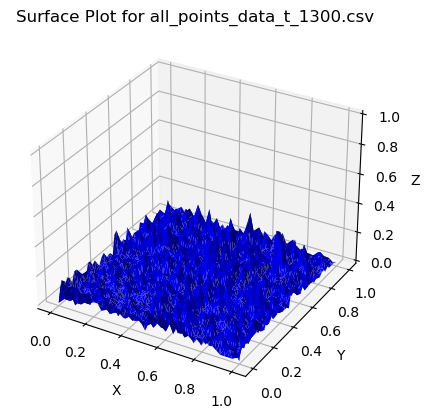

In [19]:
#This code takes the data from the previous code's results. The isotherm is plotted using the coordinates calculated in last code.
#The result will be pictures of the isotherm snapshot. Play the pictures as a movie will give the animation of how 30 degree isotherm
#envolves. You may repeat the same process for other temperature to obtain the animation for other temperatures.
import os
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Get the current directory where the notebook is located
notebook_dir = os.path.dirname(os.path.abspath('__file__'))

# Path to the directory containing the CSV files (assumed to be the same as the notebook directory)
data_dir = notebook_dir

# Create a directory 'static' to save the PNG files
output_dir = os.path.join(notebook_dir, 'nonestatic')
os.makedirs(output_dir, exist_ok=True)

# Function to plot and save the surface plot
def plot_surface(csv_path, output_path):
    df = pd.read_csv(csv_path)
    
    # Check if there are at least three points
    if len(df) < 3:
        print(f"Not enough points to create a surface plot for {os.path.basename(csv_path)}")
        return
    
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    
    # Use a single color for all data points
    ax.plot_trisurf(df['X'], df['Y'], df['Z'], color='blue')  # You can replace 'blue' with your desired color
    
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title(f'Surface Plot for {os.path.basename(csv_path)}')
    plt.savefig(output_path)
    plt.close()

# Iterate through each CSV file in the directory
for filename in os.listdir(data_dir):
    if filename.endswith('.csv'):
        csv_path = os.path.join(data_dir, filename)
        output_path = os.path.join(output_dir, f'{os.path.splitext(filename)[0]}.png')
        plot_surface(csv_path, output_path)

print("Plots saved successfully.")

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
from ipywidgets import interact, widgets
import time

# Parameters
length_x = 1.0      # Length of the domain in the x-direction
length_y = 1.0      # Length of the domain in the y-direction
length_z = 1.0      # Length of the domain in the z-direction
num_points_x = 50   # Number of spatial points in the x-direction
num_points_y = 50   # Number of spatial points in the y-direction
num_points_z = 50   # Number of spatial points in the z-direction
alpha = 0.01        # Thermal diffusivity
velocity = 10      # Advection velocity in the z-direction

# Spatial discretization
dx = length_x / (num_points_x - 1)
dy = length_y / (num_points_y - 1)
dz = length_z / (num_points_z - 1)
x = np.linspace(0, length_x, num_points_x)
y = np.linspace(0, length_y, num_points_y)
z = np.linspace(0, length_z, num_points_z)
X, Y, Z = np.meshgrid(x, y, z)

# Time parameters
total_time = 20.0    # Total simulation time (seconds)
num_time_steps = 3200
dt = total_time / num_time_steps

# Initialize temperature field
initial_temperature = np.zeros((num_points_x, num_points_y, num_points_z))

# Define heat source
heat_source = {   
    'position_x': [0.3, 0.7],
    'position_y': [0.3, 0.7],
    'position_z': [0.0, 0.1],
    'temperature': 150.0
}

# Set initial temperature within the heat source region
source_x_start = int(heat_source['position_x'][0] * num_points_x)
source_x_end = int(heat_source['position_x'][1] * num_points_x) + 1
source_y_start = int(heat_source['position_y'][0] * num_points_y)
source_y_end = int(heat_source['position_y'][1] * num_points_y) + 1
source_z_start = int(heat_source['position_z'][0] * num_points_z)
source_z_end = int(heat_source['position_z'][1] * num_points_z) + 1
initial_temperature[source_x_start:source_x_end, source_y_start:source_y_end, source_z_start:source_z_end] = heat_source['temperature']

# Initialize updated_temperature outside the update function
updated_temperature = initial_temperature.copy()

# Function to update the plot for each time step
def update(y_value, z_value, frame):
    global updated_temperature, initial_temperature
    # Finite difference solution
    updated_temperature = initial_temperature.copy()

    # Apply advection-diffusion to the entire domain
    updated_temperature[1:-1, 1:-1, 1:-1] += alpha * dt * (
        (updated_temperature[:-2, 1:-1, 1:-1] - 2 * updated_temperature[1:-1, 1:-1, 1:-1] + updated_temperature[2:, 1:-1, 1:-1]) / dx**2 +
        (updated_temperature[1:-1, :-2, 1:-1] - 2 * updated_temperature[1:-1, 1:-1, 1:-1] + updated_temperature[1:-1, 2:, 1:-1]) / dy**2 +
        (updated_temperature[1:-1, 1:-1, :-2] - 2 * updated_temperature[1:-1, 1:-1, 1:-1] + updated_temperature[1:-1, 1:-1, 2:]) / dz**2 -
        velocity * (updated_temperature[1:-1, 1:-1, 1:-1] - updated_temperature[1:-1, 1:-1, :-2]) / dz
    )

    # Apply Dirichlet boundary conditions for the heat source
    updated_temperature[source_x_start:source_x_end, source_y_start:source_y_end, source_z_start:source_z_end] = heat_source['temperature']

    # Apply Neumann boundary conditions
    updated_temperature[0, 1:-1, 1:-1] = updated_temperature[1, 1:-1, 1:-1]  # Left boundary
    updated_temperature[-1, 1:-1, 1:-1] = updated_temperature[-2, 1:-1, 1:-1]  # Right boundary
    updated_temperature[1:-1, 0, 1:-1] = updated_temperature[1:-1, 1, 1:-1]  # Front boundary
    updated_temperature[1:-1, -1, 1:-1] = updated_temperature[1:-1, -2, 1:-1]  # Back boundary
    updated_temperature[1:-1, 1:-1, 0] = updated_temperature[1:-1, 1:-1, 1]  # Top boundary
    updated_temperature[1:-1, 1:-1, -1] = updated_temperature[1:-1, 1:-1, -2]  # Bottom boundary

    # Apply constraints
    updated_temperature[updated_temperature < 0] = 0  # Ensure temperature is not negative
    updated_temperature[updated_temperature > heat_source['temperature']] = heat_source['temperature']

    # Update initial temperature for the next iteration
    initial_temperature = updated_temperature.copy()

    # Extract temperature values along the y-axis at a specific z-value
    temperature_curve = updated_temperature[:, int(y_value * num_points_y), int(z_value * num_points_z)]

    # Update plot data
    plt.plot(x, temperature_curve, label=f'Time: {frame * dt:.2f} s')
    plt.xlabel('X axis value')
    plt.ylabel('Temperature (°C)')
    plt.title(f'Temperature Curve at y={y_value}, z={z_value}')
    plt.legend()
    plt.grid(True)
    plt.show()

# Use the interactive update function with sliders
interact(update, y_value=widgets.FloatSlider(min=0, max=1, step=0.1, value=0.5),
         z_value=widgets.FloatSlider(min=0, max=1, step=0.1, value=0.1),
         frame=widgets.IntSlider(min=0, max=num_time_steps, step=1, value=0))



interactive(children=(FloatSlider(value=0.5, description='y_value', max=1.0), FloatSlider(value=0.1, descripti…

<function __main__.update(y_value, z_value, frame)>

Enter X-coordinate of the user-specified point (between 0 and 1): 0.5
Enter Y-coordinate of the user-specified point (between 0 and 1): 0.5
Enter Z-coordinate of the user-specified point (between 0 and 1): 0.5


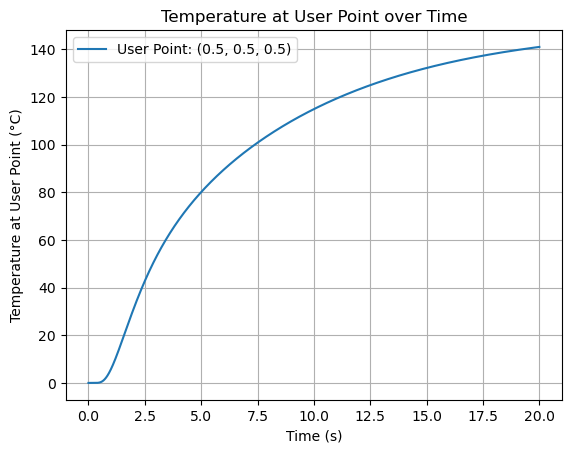

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
import time

# Parameters
length_x = 1.0      # Length of the domain in the x-direction
length_y = 1.0      # Length of the domain in the y-direction
length_z = 1.0      # Length of the domain in the z-direction
num_points_x = 50   # Number of spatial points in the x-direction
num_points_y = 50   # Number of spatial points in the y-direction
num_points_z = 50   # Number of spatial points in the z-direction
alpha = 0.01        # Thermal diffusivity
velocity = 10       # Advection velocity in the z-direction

# Spatial discretization
dx = length_x / (num_points_x - 1)
dy = length_y / (num_points_y - 1)
dz = length_z / (num_points_z - 1)
x = np.linspace(0, length_x, num_points_x)
y = np.linspace(0, length_y, num_points_y)
z = np.linspace(0, length_z, num_points_z)

# Time parameters
total_time = 20.0    # Total simulation time (seconds)
num_time_steps = 3200
dt = total_time / num_time_steps

# Initialize temperature field
initial_temperature = np.zeros((num_points_x, num_points_y, num_points_z))

# Define heat source
heat_source = {   
    'position_x': [0.3, 0.7],
    'position_y': [0.3, 0.7],
    'position_z': [0.0, 0.1],
    'temperature': 150.0
}

# Set initial temperature within the heat source region
source_x_start = int(heat_source['position_x'][0] * num_points_x)
source_x_end = int(heat_source['position_x'][1] * num_points_x) + 1
source_y_start = int(heat_source['position_y'][0] * num_points_y)
source_y_end = int(heat_source['position_y'][1] * num_points_y) + 1
source_z_start = int(heat_source['position_z'][0] * num_points_z)
source_z_end = int(heat_source['position_z'][1] * num_points_z) + 1
initial_temperature[source_x_start:source_x_end, source_y_start:source_y_end, source_z_start:source_z_end] = heat_source['temperature']

# Initialize updated_temperature outside the update function
updated_temperature = initial_temperature.copy()

# Function to update the plot for each time step
def update(user_input_x, user_input_y, user_input_z):
    global updated_temperature, initial_temperature
    temperature_at_user_point_list = []

    # Iterate through time steps
    for frame in range(num_time_steps):
        # Finite difference solution
        updated_temperature = initial_temperature.copy()

        # Apply advection-diffusion to the entire domain
        updated_temperature[1:-1, 1:-1, 1:-1] += alpha * dt * (
            (updated_temperature[:-2, 1:-1, 1:-1] - 2 * updated_temperature[1:-1, 1:-1, 1:-1] + updated_temperature[2:, 1:-1, 1:-1]) / dx**2 +
            (updated_temperature[1:-1, :-2, 1:-1] - 2 * updated_temperature[1:-1, 1:-1, 1:-1] + updated_temperature[1:-1, 2:, 1:-1]) / dy**2 +
            (updated_temperature[1:-1, 1:-1, :-2] - 2 * updated_temperature[1:-1, 1:-1, 1:-1] + updated_temperature[1:-1, 1:-1, 2:]) / dz**2 -
            velocity * (updated_temperature[1:-1, 1:-1, 1:-1] - updated_temperature[1:-1, 1:-1, :-2]) / dz
        )

        # Apply Dirichlet boundary conditions for the heat source
        updated_temperature[source_x_start:source_x_end, source_y_start:source_y_end, source_z_start:source_z_end] = heat_source['temperature']

        # Apply Neumann boundary conditions
        updated_temperature[0, 1:-1, 1:-1] = updated_temperature[1, 1:-1, 1:-1]  # Left boundary
        updated_temperature[-1, 1:-1, 1:-1] = updated_temperature[-2, 1:-1, 1:-1]  # Right boundary
        updated_temperature[1:-1, 0, 1:-1] = updated_temperature[1:-1, 1, 1:-1]  # Front boundary
        updated_temperature[1:-1, -1, 1:-1] = updated_temperature[1:-1, -2, 1:-1]  # Back boundary
        updated_temperature[1:-1, 1:-1, 0] = updated_temperature[1:-1, 1:-1, 1]  # Top boundary
        updated_temperature[1:-1, 1:-1, -1] = updated_temperature[1:-1, 1:-1, -2]  # Bottom boundary

        # Apply constraints
        updated_temperature[updated_temperature < 0] = 0  # Ensure temperature is not negative
        updated_temperature[updated_temperature > heat_source['temperature']] = heat_source['temperature']

        # Update initial temperature for the next iteration
        initial_temperature = updated_temperature.copy()

        # Extract temperature at the user-specified point
        user_x_index = int((user_input_x / length_x) * (num_points_x - 1))
        user_y_index = int((user_input_y / length_y) * (num_points_y - 1))
        user_z_index = int((user_input_z / length_z) * (num_points_z - 1))
        temperature_at_user_point = updated_temperature[user_x_index, user_y_index, user_z_index]

        temperature_at_user_point_list.append(temperature_at_user_point)

    # Plot the temperature at the user-specified point as a function of time
    plt.plot(np.arange(num_time_steps) * dt, temperature_at_user_point_list, label=f'User Point: ({user_input_x}, {user_input_y}, {user_input_z})')
    plt.xlabel('Time (s)')
    plt.ylabel('Temperature at User Point (°C)')
    plt.title('Temperature at User Point over Time')
    plt.legend()
    plt.grid(True)
    plt.show()

# User input for the fixed temperature point
user_input_x = float(input("Enter X-coordinate of the user-specified point (between 0 and 1): "))
user_input_y = float(input("Enter Y-coordinate of the user-specified point (between 0 and 1): "))
user_input_z = float(input("Enter Z-coordinate of the user-specified point (between 0 and 1): "))

# Use the update function to generate the temperature curve
update(user_input_x, user_input_y, user_input_z)


In [ ]:
#This plot tells us how temperature envolves in the cross section. If we change z, we will see a large change in temperature. 
#we also sees the temperature changes quickly if we move horizontally, so in order to stay in suitble temperature reigons, the organic molecues
#need to have horizontal stability in x direction.The same goes for y direction. Fortunately due to advection, the fluid that rises up will
#carry the molecues and move them upward, thus making sure the organic molecues stay close to the isotherm,

#This tells us for life to start, the only variation the particles can have is the z direction.
#We now study under advection how to control the temperature at a point to be fixed at some temperature by controlling the on/off of source.

In [66]:
#This code tells us the temperature-time relation of interested point
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
import time
import os
# Parameters
length_x = 1.0      # Length of the domain in the x-direction
length_y = 1.0      # Length of the domain in the y-direction
length_z = 1.0      # Length of the domain in the z-direction
num_points_x = 50   # Number of spatial points in the x-direction
num_points_y = 50   # Number of spatial points in the y-direction
num_points_z = 50   # Number of spatial points in the z-direction
alpha = 0.01        # Thermal diffusivity
velocity = 10       # Advection velocity in the z-direction

# Spatial discretization
dx = length_x / (num_points_x - 1)
dy = length_y / (num_points_y - 1)
dz = length_z / (num_points_z - 1)
x = np.linspace(0, length_x, num_points_x)
y = np.linspace(0, length_y, num_points_y)
z = np.linspace(0, length_z, num_points_z)

# Time parameters
total_time = 20.0    # Total simulation time (seconds)
num_time_steps = 3200
dt = total_time / num_time_steps

# Initialize temperature field
initial_temperature = np.zeros((num_points_x, num_points_y, num_points_z))

# Define heat source
heat_source = {   
    'position_x': [0.3, 0.7],
    'position_y': [0.3, 0.7],
    'position_z': [0.0, 0.1],
    'temperature': 150.0
}

# Set initial temperature within the heat source region
source_x_start = int(heat_source['position_x'][0] * num_points_x)
source_x_end = int(heat_source['position_x'][1] * num_points_x) + 1
source_y_start = int(heat_source['position_y'][0] * num_points_y)
source_y_end = int(heat_source['position_y'][1] * num_points_y) + 1
source_z_start = int(heat_source['position_z'][0] * num_points_z)
source_z_end = int(heat_source['position_z'][1] * num_points_z) + 1
initial_temperature[source_x_start:source_x_end, source_y_start:source_y_end, source_z_start:source_z_end] = heat_source['temperature']

# Initialize updated_temperature outside the update function
updated_temperature = initial_temperature.copy()

# Function to output temperature at the user-specified point at each time step to a CSV file
def output_temperature_to_csv(user_input_x, user_input_y, user_input_z, output_file):
    global updated_temperature, initial_temperature

    with open(output_file, 'w', newline='') as csvfile:
        csv_writer = csv.writer(csvfile)
        csv_writer.writerow(['Frame', 'Time (s)', 'Temperature at User Point (°C)'])

        # Iterate through time steps
        for frame in range(num_time_steps):
            # Finite difference solution
            updated_temperature = initial_temperature.copy()

            # Apply advection-diffusion to the entire domain
            updated_temperature[1:-1, 1:-1, 1:-1] += alpha * dt * (
                (updated_temperature[:-2, 1:-1, 1:-1] - 2 * updated_temperature[1:-1, 1:-1, 1:-1] + updated_temperature[2:, 1:-1, 1:-1]) / dx**2 +
                (updated_temperature[1:-1, :-2, 1:-1] - 2 * updated_temperature[1:-1, 1:-1, 1:-1] + updated_temperature[1:-1, 2:, 1:-1]) / dy**2 +
                (updated_temperature[1:-1, 1:-1, :-2] - 2 * updated_temperature[1:-1, 1:-1, 1:-1] + updated_temperature[1:-1, 1:-1, 2:]) / dz**2 -
                velocity * (updated_temperature[1:-1, 1:-1, 1:-1] - updated_temperature[1:-1, 1:-1, :-2]) / dz
            )

            # Apply Dirichlet boundary conditions for the heat source
            updated_temperature[source_x_start:source_x_end, source_y_start:source_y_end, source_z_start:source_z_end] = heat_source['temperature']

            # Apply Neumann boundary conditions
            updated_temperature[0, 1:-1, 1:-1] = updated_temperature[1, 1:-1, 1:-1]  # Left boundary
            updated_temperature[-1, 1:-1, 1:-1] = updated_temperature[-2, 1:-1, 1:-1]  # Right boundary
            updated_temperature[1:-1, 0, 1:-1] = updated_temperature[1:-1, 1, 1:-1]  # Front boundary
            updated_temperature[1:-1, -1, 1:-1] = updated_temperature[1:-1, -2, 1:-1]  # Back boundary
            updated_temperature[1:-1, 1:-1, 0] = updated_temperature[1:-1, 1:-1, 1]  # Top boundary
            updated_temperature[1:-1, 1:-1, -1] = updated_temperature[1:-1, 1:-1, -2]  # Bottom boundary

            # Apply constraints
            updated_temperature[updated_temperature < 0] = 0  # Ensure temperature is not negative
            updated_temperature[updated_temperature > heat_source['temperature']] = heat_source['temperature']

            # Update initial temperature for the next iteration
            initial_temperature = updated_temperature.copy()

            # Extract temperature at the user-specified point
            user_x_index = int((user_input_x / length_x) * (num_points_x - 1))
            user_y_index = int((user_input_y / length_y) * (num_points_y - 1))
            user_z_index = int((user_input_z / length_z) * (num_points_z - 1))
            temperature_at_user_point = updated_temperature[user_x_index, user_y_index, user_z_index]

            # Output temperature information to CSV file
            csv_writer.writerow([frame, frame * dt, temperature_at_user_point])

# User input for the fixed temperature point
user_input_x = float(input("Enter X-coordinate of the user-specified point (between 0 and 1): "))
user_input_y = float(input("Enter Y-coordinate of the user-specified point (between 0 and 1): "))
user_input_z = float(input("Enter Z-coordinate of the user-specified point (between 0 and 1): "))

# Get the user's desktop directory
desktop_path = os.path.join(os.path.expanduser('~'), 'Desktop')

# Specify the output CSV file on the desktop
output_file = os.path.join(desktop_path, 'temperature_output.csv')

# Use the output_temperature_to_csv function to write the temperature information to a CSV file
output_temperature_to_csv(user_input_x, user_input_y, user_input_z, output_file)

print(f"Temperature information has been written to {output_file}")

Enter X-coordinate of the user-specified point (between 0 and 1): 0.5
Enter Y-coordinate of the user-specified point (between 0 and 1): 0.5
Enter Z-coordinate of the user-specified point (between 0 and 1): 0.5
Temperature information has been written to C:\Users\lucky\Desktop\temperature_output.csv


In [87]:
#When the interested point reaches the target temperature
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
import time
import os
# Parameters
length_x = 1.0      # Length of the domain in the x-direction
length_y = 1.0      # Length of the domain in the y-direction
length_z = 1.0      # Length of the domain in the z-direction
num_points_x = 50   # Number of spatial points in the x-direction
num_points_y = 50   # Number of spatial points in the y-direction
num_points_z = 50   # Number of spatial points in the z-direction
alpha = 0.01        # Thermal diffusivity
velocity = 10       # Advection velocity in the z-direction

# Spatial discretization
dx = length_x / (num_points_x - 1)
dy = length_y / (num_points_y - 1)
dz = length_z / (num_points_z - 1)
x = np.linspace(0, length_x, num_points_x)
y = np.linspace(0, length_y, num_points_y)
z = np.linspace(0, length_z, num_points_z)

# Time parameters
total_time = 20.0    # Total simulation time (seconds)
num_time_steps = 3200
dt = total_time / num_time_steps

# Initialize temperature field
initial_temperature = np.zeros((num_points_x, num_points_y, num_points_z))

# Define heat source
heat_source = {   
    'position_x': [0.3, 0.7],
    'position_y': [0.3, 0.7],
    'position_z': [0.0, 0.1],
    'temperature': 150.0
}

# Set initial temperature within the heat source region
source_x_start = int(heat_source['position_x'][0] * num_points_x)
source_x_end = int(heat_source['position_x'][1] * num_points_x) + 1
source_y_start = int(heat_source['position_y'][0] * num_points_y)
source_y_end = int(heat_source['position_y'][1] * num_points_y) + 1
source_z_start = int(heat_source['position_z'][0] * num_points_z)
source_z_end = int(heat_source['position_z'][1] * num_points_z) + 1
initial_temperature[source_x_start:source_x_end, source_y_start:source_y_end, source_z_start:source_z_end] = heat_source['temperature']

# Initialize updated_temperature outside the update function
updated_temperature = initial_temperature.copy()

# Function to output temperature at the user-specified point at each time step to a CSV file
def output_temperature_to_csv(user_input_x, user_input_y, user_input_z, output_file):
    global updated_temperature, initial_temperature

    with open(output_file, 'w', newline='') as csvfile:
        csv_writer = csv.writer(csvfile)
        csv_writer.writerow(['Frame', 'Time (s)', 'Temperature at User Point (°C)'])

        # Iterate through time steps
        for frame in range(num_time_steps):
            # Finite difference solution
            updated_temperature = initial_temperature.copy()

            # Apply advection-diffusion to the entire domain
            updated_temperature[1:-1, 1:-1, 1:-1] += alpha * dt * (
                (updated_temperature[:-2, 1:-1, 1:-1] - 2 * updated_temperature[1:-1, 1:-1, 1:-1] + updated_temperature[2:, 1:-1, 1:-1]) / dx**2 +
                (updated_temperature[1:-1, :-2, 1:-1] - 2 * updated_temperature[1:-1, 1:-1, 1:-1] + updated_temperature[1:-1, 2:, 1:-1]) / dy**2 +
                (updated_temperature[1:-1, 1:-1, :-2] - 2 * updated_temperature[1:-1, 1:-1, 1:-1] + updated_temperature[1:-1, 1:-1, 2:]) / dz**2 -
                velocity * (updated_temperature[1:-1, 1:-1, 1:-1] - updated_temperature[1:-1, 1:-1, :-2]) / dz
            )

            # Apply Dirichlet boundary conditions for the heat source
            updated_temperature[source_x_start:source_x_end, source_y_start:source_y_end, source_z_start:source_z_end] = heat_source['temperature']

            # Apply Neumann boundary conditions
            updated_temperature[0, 1:-1, 1:-1] = updated_temperature[1, 1:-1, 1:-1]  # Left boundary
            updated_temperature[-1, 1:-1, 1:-1] = updated_temperature[-2, 1:-1, 1:-1]  # Right boundary
            updated_temperature[1:-1, 0, 1:-1] = updated_temperature[1:-1, 1, 1:-1]  # Front boundary
            updated_temperature[1:-1, -1, 1:-1] = updated_temperature[1:-1, -2, 1:-1]  # Back boundary
            updated_temperature[1:-1, 1:-1, 0] = updated_temperature[1:-1, 1:-1, 1]  # Top boundary
            updated_temperature[1:-1, 1:-1, -1] = updated_temperature[1:-1, 1:-1, -2]  # Bottom boundary

            # Apply constraints
            updated_temperature[updated_temperature < 0] = 0  # Ensure temperature is not negative
            updated_temperature[updated_temperature > heat_source['temperature']] = heat_source['temperature']

            # Update initial temperature for the next iteration
            initial_temperature = updated_temperature.copy()

            # Extract temperature at the user-specified point
            user_x_index = int((user_input_x / length_x) * (num_points_x - 1))
            user_y_index = int((user_input_y / length_y) * (num_points_y - 1))
            user_z_index = int((user_input_z / length_z) * (num_points_z - 1))
            temperature_at_user_point = updated_temperature[user_x_index, user_y_index, user_z_index]

            # Output temperature information to CSV file
            csv_writer.writerow([frame, frame * dt, temperature_at_user_point])

# User input for the fixed temperature point
user_input_x = float(input("Enter X-coordinate of the user-specified point (between 0 and 1): "))
user_input_y = float(input("Enter Y-coordinate of the user-specified point (between 0 and 1): "))
user_input_z = float(input("Enter Z-coordinate of the user-specified point (between 0 and 1): "))

# Get the user's desktop directory
desktop_path = os.path.join(os.path.expanduser('~'), 'Desktop')

# Specify the output CSV file on the desktop
output_file = os.path.join(desktop_path, 'temperature_output.csv')

# Use the output_temperature_to_csv function to write the temperature information to a CSV file
output_temperature_to_csv(user_input_x, user_input_y, user_input_z, output_file)

print(f"Temperature information has been written to {output_file}")
# Function to read temperature data from the CSV file
def read_temperature_data_from_csv(csv_file):
    time_data = []
    temperature_data = []

    with open(csv_file, 'r') as csvfile:
        csv_reader = csv.DictReader(csvfile)
        for row in csv_reader:
            time_data.append(float(row['Time (s)']))
            temperature_data.append(float(row['Temperature at User Point (°C)']))

    return np.array(time_data), np.array(temperature_data)

# Function to find the closest point in the CSV data based on user input temperature
def find_closest_point(csv_file, user_input_temperature):
    time_data, temperature_data = read_temperature_data_from_csv(csv_file)

    # Find the index of the closest temperature in the CSV data
    closest_index = np.argmin(np.abs(temperature_data - user_input_temperature))

    # Print information about the closest point
    print(f"Closest Point Information:")
    print(f"Time (s): {time_data[closest_index]}")
    print(f"Temperature at User Point (°C): {temperature_data[closest_index]}")

# User input for the CSV file
csv_file_path = input("Enter the path to the CSV file (e.g., C:\\Users\\Username\\Desktop\\temperature_output.csv): ")

# User input for the target temperature
user_input_temperature = float(input("Enter the target temperature (°C): "))

# Use the find_closest_point function to find and print information about the closest point
find_closest_point(csv_file_path, user_input_temperature)

Enter X-coordinate of the user-specified point (between 0 and 1): 0.5
Enter Y-coordinate of the user-specified point (between 0 and 1): 0.5
Enter Z-coordinate of the user-specified point (between 0 and 1): 0.5
Temperature information has been written to C:\Users\lucky\Desktop\temperature_output.csv
Enter the path to the CSV file (e.g., C:\Users\Username\Desktop\temperature_output.csv): C:\Users\lucky\Desktop\temperature_output.csv
Enter the target temperature (°C): 30
Closest Point Information:
Time (s): 1.95625
Temperature at User Point (°C): 29.948419272678134


In [71]:
#We see this code returns the temperature that the intrested point reaches the temperature we want. 
#we turn off the source at the time output
#Then the heat source should be a temprature area that cools down until the source is back on.
#We take the snapshot of the system when the interested point reaches the target temperature(here I set it to 30 degrees, you can set to any numbers you want)

In [ ]:
#We see the temperature takes around 2 sec to reach the target temperature. Let us guess the oscillation period to 2s

Enter X-coordinate of the user-specified point (between 0 and 1): 0.5
Enter Y-coordinate of the user-specified point (between 0 and 1): 0.5
Enter Z-coordinate of the user-specified point (between 0 and 1): 0.5


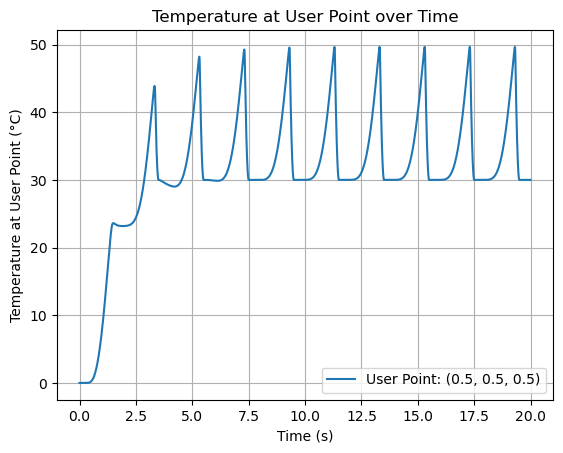

In [122]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
import time

# Parameters
length_x = 1.0      # Length of the domain in the x-direction
length_y = 1.0      # Length of the domain in the y-direction
length_z = 1.0      # Length of the domain in the z-direction
num_points_x = 50   # Number of spatial points in the x-direction
num_points_y = 50   # Number of spatial points in the y-direction
num_points_z = 50   # Number of spatial points in the z-direction
alpha = 0.01        # Thermal diffusivity
velocity = 10       # Advection velocity in the z-direction

# Spatial discretization
dx = length_x / (num_points_x - 1)
dy = length_y / (num_points_y - 1)
dz = length_z / (num_points_z - 1)
x = np.linspace(0, length_x, num_points_x)
y = np.linspace(0, length_y, num_points_y)
z = np.linspace(0, length_z, num_points_z)

# Time parameters
total_time = 20.0    # Total simulation time (seconds)
num_time_steps = 3200
dt = total_time / num_time_steps

# Initialize temperature field
initial_temperature = np.zeros((num_points_x, num_points_y, num_points_z))

# Define heat source
heat_source = {   
    'position_x': [0.3, 0.7],
    'position_y': [0.3, 0.7],
    'position_z': [0.0, 0.1],
    'amplitude': 120.0,  # Amplitude of the oscillation
    'frequency': 0.5 # Frequency of the oscillation
}

# Initialize updated_temperature outside the update function
updated_temperature = initial_temperature.copy()

# Function to update the plot for each time step
def update(user_input_x, user_input_y, user_input_z):
    global updated_temperature, initial_temperature
    temperature_at_user_point_list = []

    # Iterate through time steps
    for frame in range(num_time_steps):
        # Finite difference solution
        updated_temperature = initial_temperature.copy()

        # Update source temperature based on oscillation
        heat_source['temperature'] = 150.0 + heat_source['amplitude'] * np.sin(2 * np.pi * heat_source['frequency'] * frame * dt)

        # Apply advection-diffusion to the entire domain
        updated_temperature[1:-1, 1:-1, 1:-1] += alpha * dt * (
            (updated_temperature[:-2, 1:-1, 1:-1] - 2 * updated_temperature[1:-1, 1:-1, 1:-1] + updated_temperature[2:, 1:-1, 1:-1]) / dx**2 +
            (updated_temperature[1:-1, :-2, 1:-1] - 2 * updated_temperature[1:-1, 1:-1, 1:-1] + updated_temperature[1:-1, 2:, 1:-1]) / dy**2 +
            (updated_temperature[1:-1, 1:-1, :-2] - 2 * updated_temperature[1:-1, 1:-1, 1:-1] + updated_temperature[1:-1, 1:-1, 2:]) / dz**2 -
            velocity * (updated_temperature[1:-1, 1:-1, 1:-1] - updated_temperature[1:-1, 1:-1, :-2]) / dz
        )

        # Apply Dirichlet boundary conditions for the heat source
        updated_temperature[source_x_start:source_x_end, source_y_start:source_y_end, source_z_start:source_z_end] = heat_source['temperature']

        # Apply Neumann boundary conditions
        updated_temperature[0, 1:-1, 1:-1] = updated_temperature[1, 1:-1, 1:-1]  # Left boundary
        updated_temperature[-1, 1:-1, 1:-1] = updated_temperature[-2, 1:-1, 1:-1]  # Right boundary
        updated_temperature[1:-1, 0, 1:-1] = updated_temperature[1:-1, 1, 1:-1]  # Front boundary
        updated_temperature[1:-1, -1, 1:-1] = updated_temperature[1:-1, -2, 1:-1]  # Back boundary
        updated_temperature[1:-1, 1:-1, 0] = updated_temperature[1:-1, 1:-1, 1]  # Top boundary
        updated_temperature[1:-1, 1:-1, -1] = updated_temperature[1:-1, 1:-1, -2]  # Bottom boundary

        # Apply constraints
        updated_temperature[updated_temperature < 0] = 0  # Ensure temperature is not negative
        updated_temperature[updated_temperature > heat_source['temperature']] = heat_source['temperature']

        # Update initial temperature for the next iteration
        initial_temperature = updated_temperature.copy()

        # Extract temperature at the user-specified point
        user_x_index = int((user_input_x / length_x) * (num_points_x - 1))
        user_y_index = int((user_input_y / length_y) * (num_points_y - 1))
        user_z_index = int((user_input_z / length_z) * (num_points_z - 1))
        temperature_at_user_point = updated_temperature[user_x_index, user_y_index, user_z_index]

        temperature_at_user_point_list.append(temperature_at_user_point)

    # Plot the temperature at the user-specified point as a function of time
    plt.plot(np.arange(num_time_steps) * dt, temperature_at_user_point_list, label=f'User Point: ({user_input_x}, {user_input_y}, {user_input_z})')
    plt.xlabel('Time (s)')
    plt.ylabel('Temperature at User Point (°C)')
    plt.title('Temperature at User Point over Time')
    plt.legend()
    plt.grid(True)
    plt.show()

# User input for the fixed temperature point
user_input_x = float(input("Enter X-coordinate of the user-specified point (between 0 and 1): "))
user_input_y = float(input("Enter Y-coordinate of the user-specified point (between 0 and 1): "))
user_input_z = float(input("Enter Z-coordinate of the user-specified point (between 0 and 1): "))

# Use the update function to generate the temperature curve
update(user_input_x, user_input_y, user_input_z)


In [ ]:
#By multiple adjustments, we see the temperature oscillates at the point of interest (here 0.5 0.5 0.5) can be maintained around 30 degrees
#if temperature of the vent oscillates between 150 and 30, with frequency 2Hz. You may adjust the point of intrest your self to see what happens elsewhere. 
#Notice that you may need to change the amplitude (minimum temp=150-amplitude) and frequency.

In [ ]:
#This proves that there is a possibility to reach thermal equillibrium at the same location through time, even though there is oscillation
#the temperature oscillates. Notice that there is a way to reach 30 degrees actually: the point of interest is (0.5 0.5 0.5)

Enter X-coordinate of the user-specified point (between 0 and 1): 0.5
Enter Y-coordinate of the user-specified point (between 0 and 1): 0.5
Enter Z-coordinate of the user-specified point (between 0 and 1): 0.5


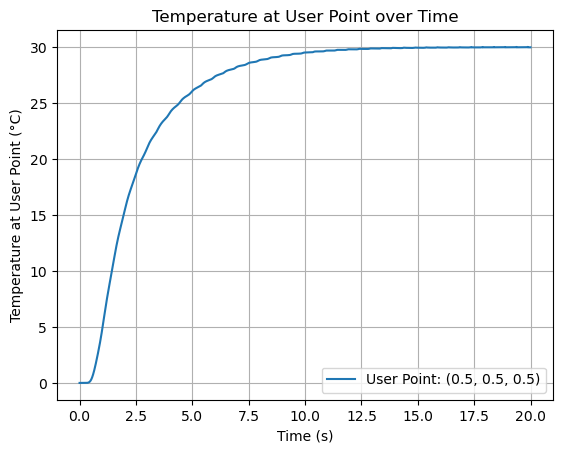

In [124]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
import time

# Parameters
length_x = 1.0      # Length of the domain in the x-direction
length_y = 1.0      # Length of the domain in the y-direction
length_z = 1.0      # Length of the domain in the z-direction
num_points_x = 50   # Number of spatial points in the x-direction
num_points_y = 50   # Number of spatial points in the y-direction
num_points_z = 50   # Number of spatial points in the z-direction
alpha = 0.01        # Thermal diffusivity
velocity = 10       # Advection velocity in the z-direction

# Spatial discretization
dx = length_x / (num_points_x - 1)
dy = length_y / (num_points_y - 1)
dz = length_z / (num_points_z - 1)
x = np.linspace(0, length_x, num_points_x)
y = np.linspace(0, length_y, num_points_y)
z = np.linspace(0, length_z, num_points_z)

# Time parameters
total_time = 20.0    # Total simulation time (seconds)
num_time_steps = 3200
dt = total_time / num_time_steps

# Initialize temperature field
initial_temperature = np.zeros((num_points_x, num_points_y, num_points_z))

# Define heat source
heat_source = {   
    'position_x': [0.3, 0.7],
    'position_y': [0.3, 0.7],
    'position_z': [0.0, 0.1],
    'amplitude': 120.0,  # Amplitude of the oscillation
    'frequency': 2 # Frequency of the oscillation
}

# Initialize updated_temperature outside the update function
updated_temperature = initial_temperature.copy()

# Function to update the plot for each time step
def update(user_input_x, user_input_y, user_input_z):
    global updated_temperature, initial_temperature
    temperature_at_user_point_list = []

    # Iterate through time steps
    for frame in range(num_time_steps):
        # Finite difference solution
        updated_temperature = initial_temperature.copy()

        # Update source temperature based on oscillation
        heat_source['temperature'] = 150.0 + heat_source['amplitude'] * np.sin(2 * np.pi * heat_source['frequency'] * frame * dt)

        # Apply advection-diffusion to the entire domain
        updated_temperature[1:-1, 1:-1, 1:-1] += alpha * dt * (
            (updated_temperature[:-2, 1:-1, 1:-1] - 2 * updated_temperature[1:-1, 1:-1, 1:-1] + updated_temperature[2:, 1:-1, 1:-1]) / dx**2 +
            (updated_temperature[1:-1, :-2, 1:-1] - 2 * updated_temperature[1:-1, 1:-1, 1:-1] + updated_temperature[1:-1, 2:, 1:-1]) / dy**2 +
            (updated_temperature[1:-1, 1:-1, :-2] - 2 * updated_temperature[1:-1, 1:-1, 1:-1] + updated_temperature[1:-1, 1:-1, 2:]) / dz**2 -
            velocity * (updated_temperature[1:-1, 1:-1, 1:-1] - updated_temperature[1:-1, 1:-1, :-2]) / dz
        )

        # Apply Dirichlet boundary conditions for the heat source
        updated_temperature[source_x_start:source_x_end, source_y_start:source_y_end, source_z_start:source_z_end] = heat_source['temperature']

        # Apply Neumann boundary conditions
        updated_temperature[0, 1:-1, 1:-1] = updated_temperature[1, 1:-1, 1:-1]  # Left boundary
        updated_temperature[-1, 1:-1, 1:-1] = updated_temperature[-2, 1:-1, 1:-1]  # Right boundary
        updated_temperature[1:-1, 0, 1:-1] = updated_temperature[1:-1, 1, 1:-1]  # Front boundary
        updated_temperature[1:-1, -1, 1:-1] = updated_temperature[1:-1, -2, 1:-1]  # Back boundary
        updated_temperature[1:-1, 1:-1, 0] = updated_temperature[1:-1, 1:-1, 1]  # Top boundary
        updated_temperature[1:-1, 1:-1, -1] = updated_temperature[1:-1, 1:-1, -2]  # Bottom boundary

        # Apply constraints
        updated_temperature[updated_temperature < 0] = 0  # Ensure temperature is not negative
        updated_temperature[updated_temperature > heat_source['temperature']] = heat_source['temperature']

        # Update initial temperature for the next iteration
        initial_temperature = updated_temperature.copy()

        # Extract temperature at the user-specified point
        user_x_index = int((user_input_x / length_x) * (num_points_x - 1))
        user_y_index = int((user_input_y / length_y) * (num_points_y - 1))
        user_z_index = int((user_input_z / length_z) * (num_points_z - 1))
        temperature_at_user_point = updated_temperature[user_x_index, user_y_index, user_z_index]

        temperature_at_user_point_list.append(temperature_at_user_point)

    # Plot the temperature at the user-specified point as a function of time
    plt.plot(np.arange(num_time_steps) * dt, temperature_at_user_point_list, label=f'User Point: ({user_input_x}, {user_input_y}, {user_input_z})')
    plt.xlabel('Time (s)')
    plt.ylabel('Temperature at User Point (°C)')
    plt.title('Temperature at User Point over Time')
    plt.legend()
    plt.grid(True)
    plt.show()

# User input for the fixed temperature point
user_input_x = float(input("Enter X-coordinate of the user-specified point (between 0 and 1): "))
user_input_y = float(input("Enter Y-coordinate of the user-specified point (between 0 and 1): "))
user_input_z = float(input("Enter Z-coordinate of the user-specified point (between 0 and 1): "))

# Use the update function to generate the temperature curve
update(user_input_x, user_input_y, user_input_z)


In [ ]:
#This requires a high frequency source to switch between high and low.But this is highly not possible.
#The vent can not be controlled like a mosfet.....PWM wave is almost impossible to realize on hydrothermal vent.

In [ ]:
#This simulation tells us there is indeed possibility to control the temperature to a constant. In realality, we may have a heat sink somewhere
#For example a sudden flow of cold water enters simulation area. But this is hard to model since there is too much variability
#for example, when, where,what temperature, volume....
#The intention of the simulation shows that if a cold source appears at right time, there is chance to stablize the temperature
#Next week we will simulate oscillation of the molecues, and verify that there motion will not displace them too far away from this isotherm.